<a href="https://colab.research.google.com/github/thepreetsharma/Telecom-Customer-Churn-Prediction/blob/main/telecom_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom Customer Churn Prediction**



#Problem Statement
In the highly competitive telecom industry, retaining existing customers is more cost-effective than acquiring new ones. Customer churn is the phenomenon where subscribers discontinue services of a company which directly impacts revenue and long-term growth.The objective of this project is to predict whether a telecom customer is likely to churn based on their demographic details, subscribed services, billing preferences, and account information.


# Importing libraries

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import imblearn as imb

# Importing Dataset



In [79]:
churn = pd.read_csv('https://raw.githubusercontent.com/thepreetsharma/Telecom-Customer-Churn-Prediction/main/TelCo_Customer_Churn_Data.csv')

#Dataset Overview

In [80]:
churn.shape

(7043, 21)

In [81]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [83]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Cleaning

In [84]:
churn.drop(['customerID'], axis=1, inplace=True)

In [85]:
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"], errors="coerce")

In [86]:
print("Missing TotalCharges:", churn["TotalCharges"].isnull().sum())

Missing TotalCharges: 11


In [87]:
churn["TotalCharges"] = churn["TotalCharges"].fillna(churn["TotalCharges"].median())

In [88]:
churn["SeniorCitizen"] = churn["SeniorCitizen"].replace({1: "Yes", 0: "No"})

In [89]:
print("Shape after cleaning:", churn.shape)
print(churn.info())
print(churn.isnull().sum())
churn.head()

Shape after cleaning: (7043, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMe

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#EDA (Exploratory Data Analysis)

##Overall Churn Distribution

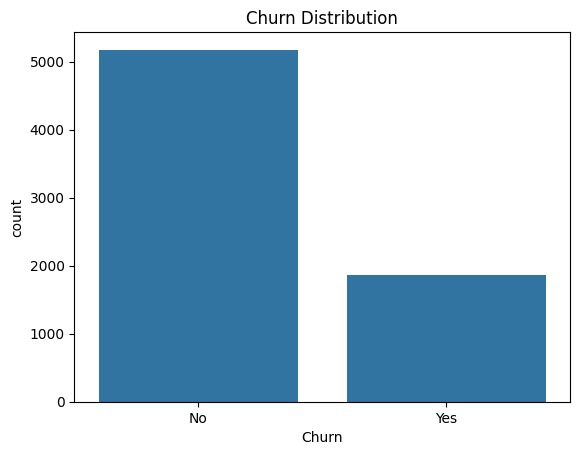

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [90]:
sns.countplot(data=churn, x="Churn")
plt.title("Churn Distribution")
plt.show()

# Percentage view
print(churn["Churn"].value_counts(normalize=True) * 100)

##Churn by Contract Type

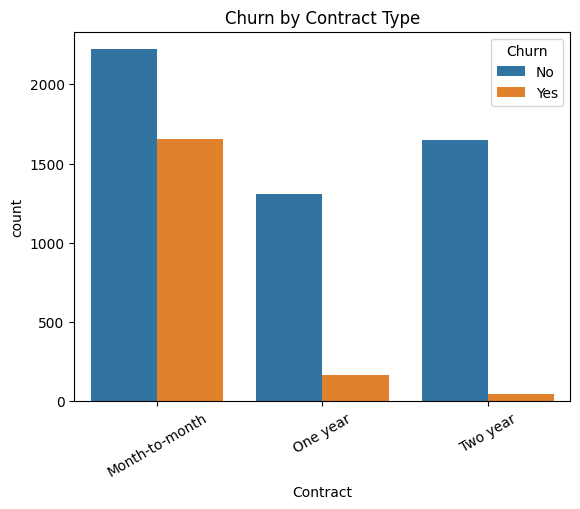

In [91]:
sns.countplot(data=churn, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")
plt.xticks(rotation=30)
plt.show()

##Churn by Payment Method

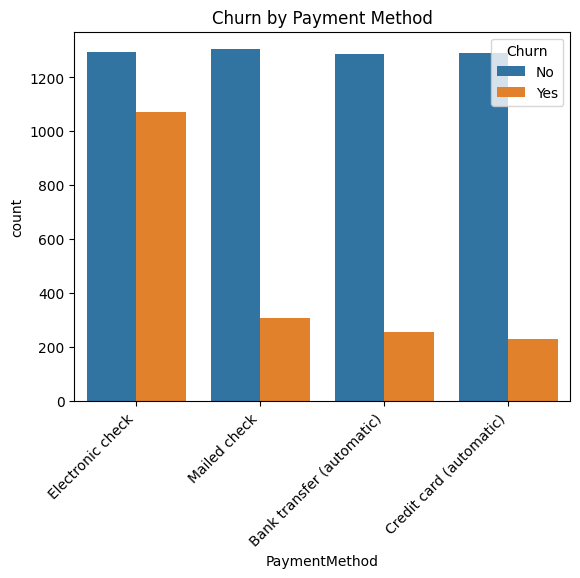

In [92]:
sns.countplot(data=churn, x="PaymentMethod", hue="Churn")
plt.title("Churn by Payment Method")
plt.xticks(rotation=45, ha="right")
plt.show()

##Tenure Distribution by Churn

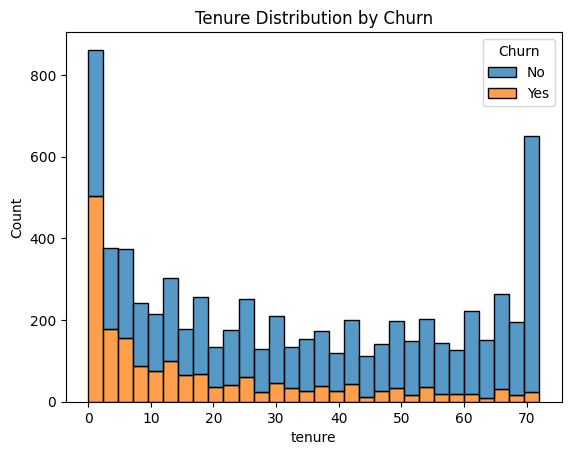

In [93]:
sns.histplot(data=churn, x="tenure", hue="Churn", bins=30, kde=False, multiple="stack")
plt.title("Tenure Distribution by Churn")
plt.show()

##Monthly Charges by Churn

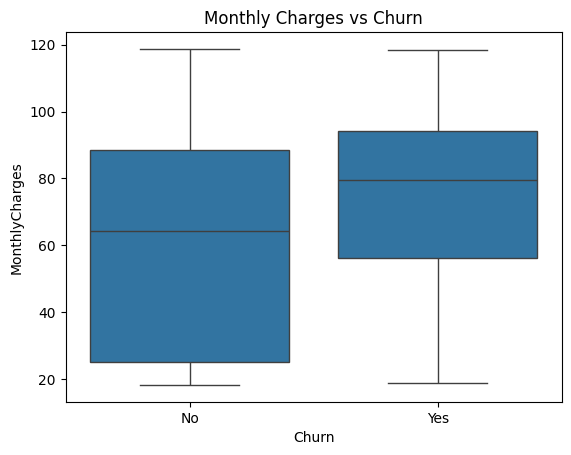

In [94]:
sns.boxplot(data=churn, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.show()

##Total Charges by Churn

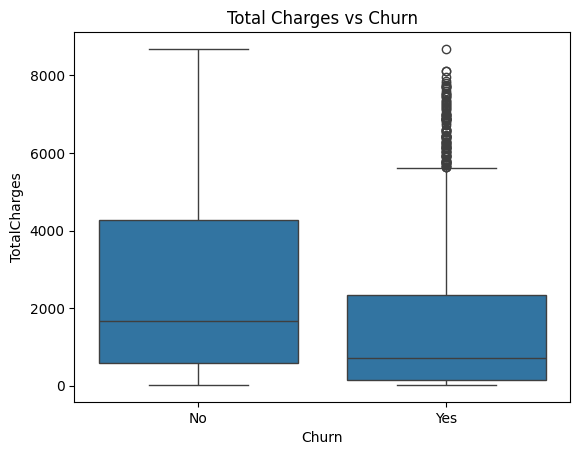

In [95]:
sns.boxplot(data=churn, x="Churn", y="TotalCharges")
plt.title("Total Charges vs Churn")
plt.show()

#Preprocessing

##Encode Target Variable

In [96]:
churn['Churn'] = churn['Churn'].map({'Yes': 1, 'No': 0})

##Identify Columns

In [97]:
# Separate target and features
X = churn.drop("Churn", axis=1)
y = churn["Churn"]

# Identify numerical and categorical features
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


##Encode Categorical Columns

In [98]:
from sklearn.preprocessing import LabelEncoder

# Binary categories → LabelEncoder (Yes/No → 0/1)
binary_cols = [col for col in cat_cols if churn[col].nunique() == 2]

le = LabelEncoder()
for col in binary_cols:
    churn[col] = le.fit_transform(churn[col])

# Multi-category → One-hot encoding
multi_cat_cols = [col for col in cat_cols if col not in binary_cols]
df = pd.get_dummies(churn, columns=multi_cat_cols, drop_first=True)

print("After encoding shape:", df.shape)

After encoding shape: (7043, 31)


##Scale Numerical Features

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale only numeric columns
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,False,False,False,False,False,False,False,False,True,False


#Train and Test Data

##Train Test Data Split

In [100]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Stratified split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (4930, 30) (4930,)
Test shape: (2113, 30) (2113,)


##Scaling Train Test Split

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training, transform both
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#Modeling

## Logistic Regression Classification

Logistic regression classification is a simple and basic statistical model used to predict the probability of an event happening or not happening. It is often used when the outcome we want to predict falls into two categories, such as "yes" or "no," "success" or "failure." The model analyzes input variables and calculates a numeric value between 0 and 1, representing the probability of belonging to one of the categories. It helps classify new data points based on their characteristics and the patterns learned from the training data.

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

ROC-AUC: 0.8447630106400573


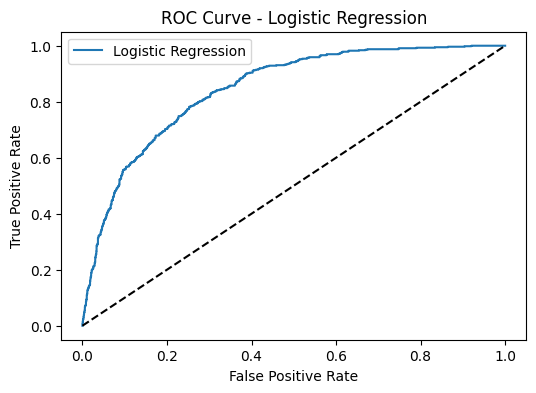

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]

# Evaluation
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], "k--")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


### confusion matrix of logistic regression

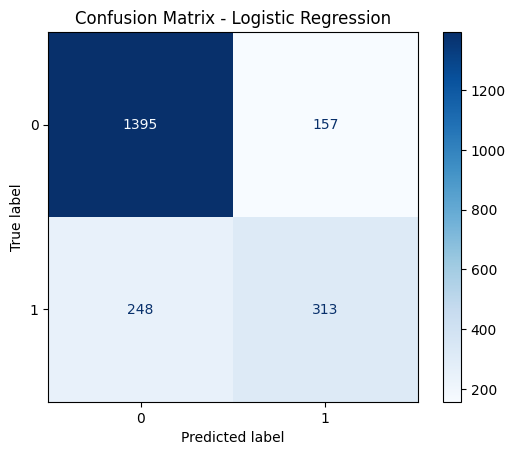

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Random Forest classification
Random Forest classification is an algorithm that combines multiple decision trees to make predictions. It works by creating a "forest" of trees, where each tree is trained on a random subset of the data and features. When making predictions, the algorithm gathers the predictions from each tree and selects the most popular class as the final prediction. Random Forest classification is known for its accuracy and ability to handle complex datasets.

Random Forest Results
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.63      0.48      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113

ROC-AUC: 0.823843536946175


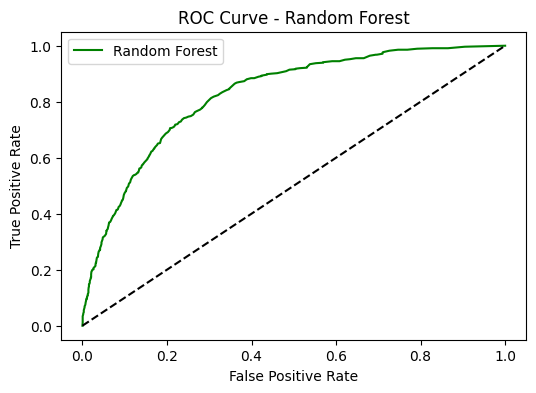

In [104]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# Evaluation
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Random Forest", color="green")
plt.plot([0,1], [0,1], "k--")
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### confusion matrix of random forest classification

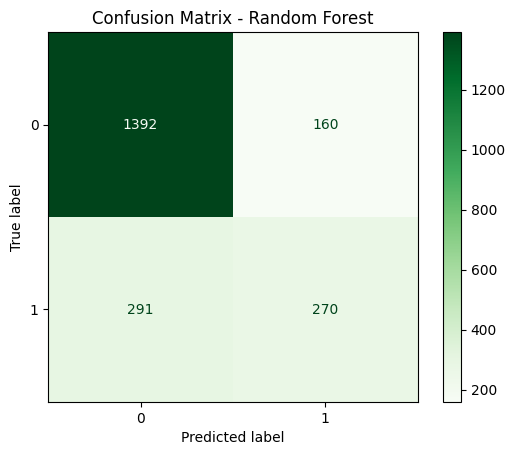

In [105]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

##XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm that builds multiple decision trees sequentially, with each tree correcting the errors of the previous ones. It is fast, handles missing data well, and is widely used for both classification and regression tasks due to its high accuracy and efficiency.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:08:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1552
           1       0.60      0.52      0.56       561

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.78      2113

ROC-AUC: 0.8164343174008123


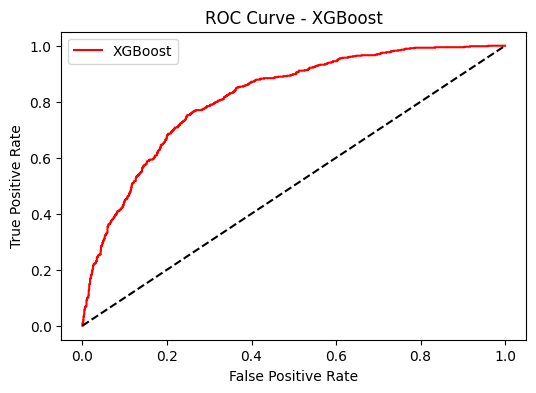

In [106]:
from xgboost import XGBClassifier

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Train
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

# Evaluation
print("XGBoost Results")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="XGBoost", color="red")
plt.plot([0,1], [0,1], "k--")
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

###confusion matrix of XGBoost

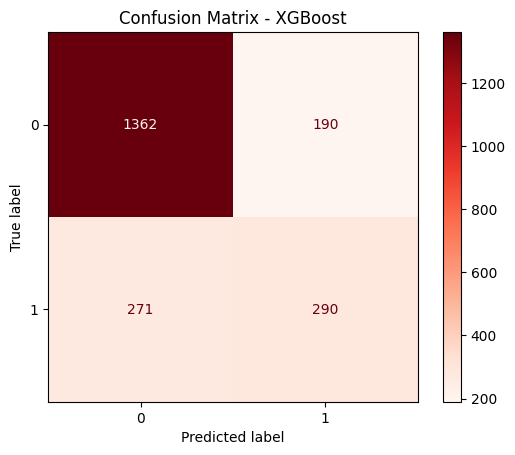

In [107]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp.plot(cmap="Reds")
plt.title("Confusion Matrix - XGBoost")
plt.show()

#Model Comparison

##Scores of the Models applied

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Dictionary to store results
scores = {}

# Logistic Regression
scores["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1": f1_score(y_test, y_pred_lr),
    "ROC-AUC": roc_auc_score(y_test, y_proba_lr)
}

# Random Forest
scores["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_proba_rf)
}

# XGBoost
scores["XGBoost"] = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1": f1_score(y_test, y_pred_xgb),
    "ROC-AUC": roc_auc_score(y_test, y_proba_xgb)
}

# Convert to DataFrame for nice view
score_df = pd.DataFrame(scores).T
print(score_df)

# Optional: Round values for readability
score_df_rounded = score_df.round(3)
display(score_df_rounded)

                     Accuracy  Precision    Recall        F1   ROC-AUC
Logistic Regression  0.808329   0.665957  0.557932  0.607177  0.844763
Random Forest        0.786559   0.627907  0.481283  0.544904  0.823844
XGBoost              0.781827   0.604167  0.516934  0.557157  0.816434


,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.808,0.666,0.558,0.607,0.845
Random Forest,0.787,0.628,0.481,0.545,0.824
XGBoost,0.782,0.604,0.517,0.557,0.816


##Visual Comparison of the Models



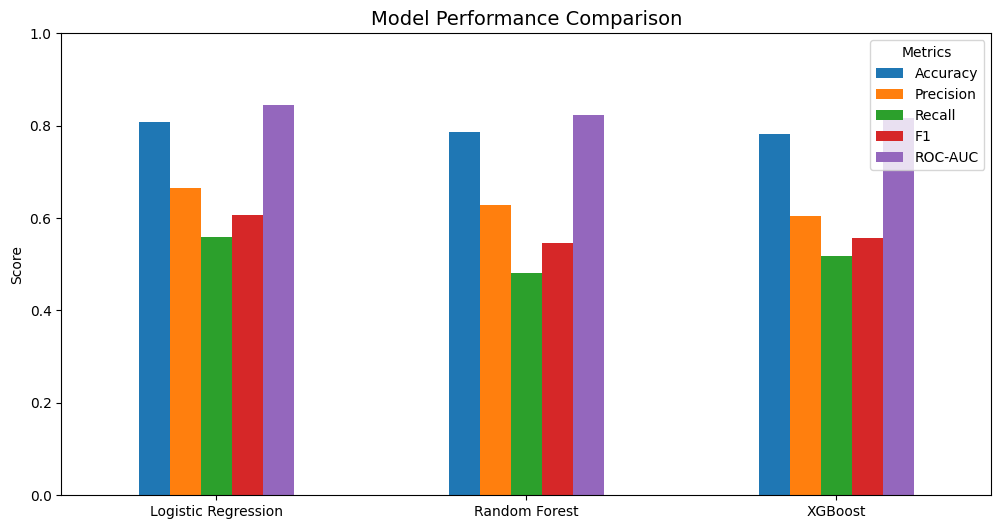

In [109]:
import matplotlib.pyplot as plt

# Use the score_df_rounded from earlier (or score_df if not rounded)
metrics = ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]

# Plot grouped bar chart
score_df_rounded[metrics].plot(kind="bar", figsize=(12,6))
plt.title("Model Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.ylim(0,1)  # since all metrics are between 0 and 1
plt.legend(title="Metrics")
plt.xticks(rotation=0)
plt.show()

#Feature Importance

##Random Forest Feature Importance

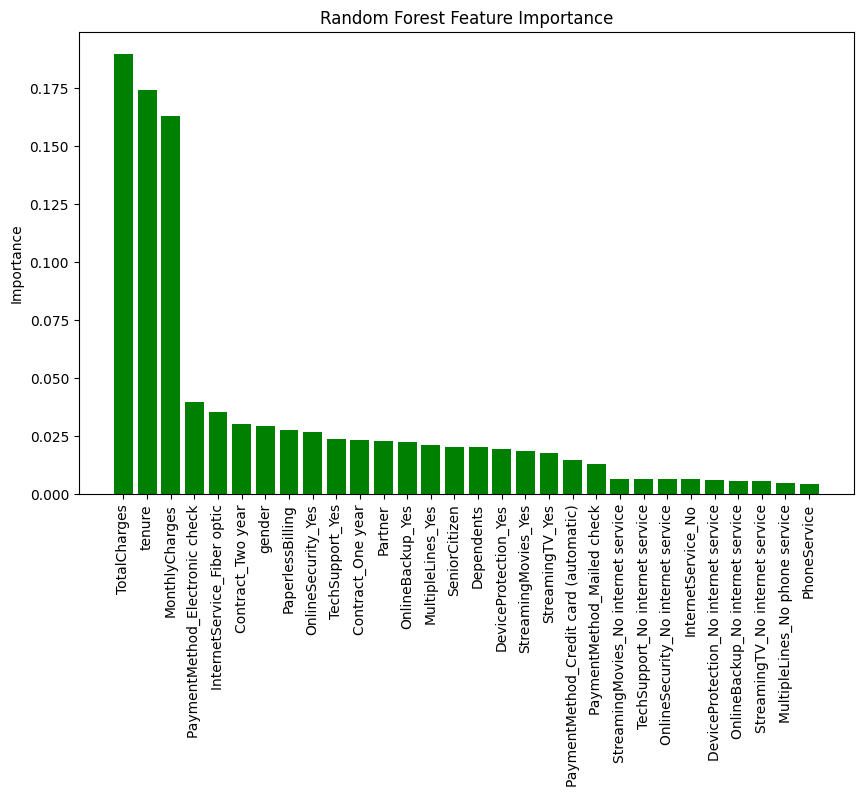

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# --- Random Forest Feature Importance ---
rf_importances = rf.feature_importances_
features = X_train.columns

# Sort features by importance
indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importance")
plt.bar(range(len(indices)), rf_importances[indices], color="green", align="center")
plt.xticks(range(len(indices)), features[indices], rotation=90)
plt.ylabel("Importance")
plt.show()

##XGBoost Feature Importance

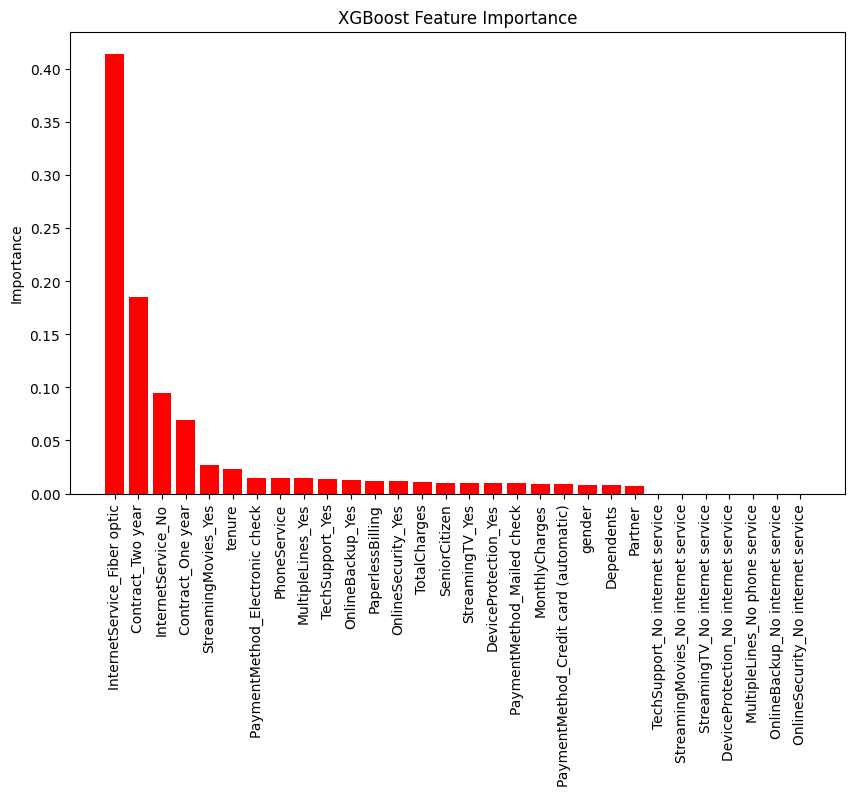

In [111]:
# --- XGBoost Feature Importance ---
xgb_importances = xgb.feature_importances_
indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("XGBoost Feature Importance")
plt.bar(range(len(indices)), xgb_importances[indices], color="red", align="center")
plt.xticks(range(len(indices)), features[indices], rotation=90)
plt.ylabel("Importance")
plt.show()

#Insights

##Business and Data Insights

##Model Insights

##Feature Importance Insights

##Business Recommendation Insights